<a href="https://colab.research.google.com/github/Marcel-Milosz/Dane/blob/Code-Review/Milosz_Marcel_01_niestacj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DummyClassifier score: 0.4067796610169492
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
Knn Classifie score: 0.7222222222222222

Test score: 1.0 with 1 neighbors
Test score: 0.864406779661017 with 2 neighbors
Test score: 0.8983050847457628 with 3 neighbors
Test score: 0.847457627118644 with 4 neighbors
Test score: 0.864406779661017 with 5 neighbors
Test score: 0.847457627118644 with 6 neighbors
Test score: 0.8135593220338984 with 7 neighbors
Test score: 0.8305084745762712 with 8 neighbors
Test score: 0.8305084745762712 with 9 neighbors
Train score: 1.0 with 1 neighbors
Train score: 0.865546218487395 with 2 neighbors
Train score: 0.8235294117647058 with 3 neighbors
Train score: 0.7983193277310925 with 4 neighbors
Train score: 0.8067226890756303 with 5 neighbors
Train score: 0.7815126050420168 with 6 neighbors
Train score: 0.8235294117647058 with 7

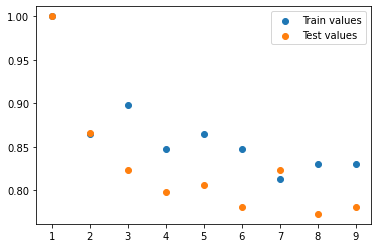

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from joblib import Memory

import matplotlib.pyplot as plt

def setCache():   
  cachedir = 'cache_mem'
  mem = Memory(cachedir)

def getData():
  # Create feature and target arrays
  X, y = load_wine(return_X_y=True) 

  # X --> wine.data
  # y --> wine.target

  return X, y

def DummyExample():
  
  '''
  Using Dummy Classifier to get the score value
  '''

  # Split X, y into training and test set
  X_train, X_test, y_train, y_test = train_test_split(getData()[0], getData()[1], test_size = 0.33, random_state=42)

  # Get the accuracy (score)
  dummy_clf = DummyClassifier(strategy="most_frequent")   # Create DummyClassifier
  dummy_clf.fit(X_train, y_train)                                     # Fit the data
  dummy_clf.predict(X_train)
  dummy_score = dummy_clf.score(X_test, y_test)

  print(f"DummyClassifier score: {dummy_score}")




def KnnExample():

  '''
  Using Knn Classifier to get the score
  '''

  # Split X, y into training and test set
  X_train, X_test, y_train, y_test = train_test_split(getData()[0], getData()[1], test_size = 0.2, random_state=42)

  knn = KNeighborsClassifier(10)
  print(knn)
  knn.fit(X_train, y_train)

  # Accuracy (score)
  Knn_score = knn.score(X_test, y_test)
  print(f"Knn Classifie score: {Knn_score}")

kn_test = {}
kn_train = {}

def getN_neighbors():

    '''
    Getting the n neighbors in kn_test and kn_train dict
    '''

    X_train, X_test, y_train, y_test = train_test_split(getData()[0], getData()[1], test_size = 0.33, random_state=42)

    for i in range(1, 10):
        kn_cls = KNeighborsClassifier(n_neighbors = i)

        kn_cls.fit(X_test, y_test)
        kn_test[i] = kn_cls.score(X_test, y_test)

        kn_cls.fit(X_train, y_train)
        kn_train[i] = kn_cls.score(X_train, y_train)

    for x, y in kn_test.items():
        print(f"Test score: {y} with {x} neighbors")

    for x, y in kn_train.items():
        print(f"Train score: {y} with {x} neighbors")



def createPlot():
    x, y = kn_test.keys(), kn_test.values()
    x1, y1 = kn_train.keys(), kn_train.values()
    plt.scatter(x, y)
    plt.scatter(x1, y1)
    plt.legend(["Train values", "Test values"])
    plt.show()

if __name__ == "__main__":
  
  # Polecenie 1, 2, 3
  setCache()
  DummyExample()
  KnnExample()

  print()

  # Polecenie 4
  getN_neighbors()
  createPlot()
